# Import der benötigten Packages

In [1]:
import urllib.request
import pandas as pd

import matplotlib.pyplot as plt

# Import der Daten
Seattle Public Library  
"checkouts by title for physical and electronic items"  
monatliche Ausleihen seit April 2005   
Diese Datei enthält über 37 Mio Zeilen und 11 Spalten.  
Diese Größe ist beim Download unhandlich, daher lade ich einzelne Ausleihjahre mit "where=checkoutyear= ".  
Offenbar werden per default nur 1000 Einträge geladen, daher setze ich das Limit manuell hoch mit "limit=...".

In [2]:
# Festlegung der URL mit Eingrenzung des Ausleihjahres und der Anzahl von Zeilen
checkout_url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2020&$limit=2000000"
checkouts_file = "checkouts.csv"

In [3]:
# Download der Daten
urllib.request.urlretrieve(checkout_url, checkouts_file)

('checkouts.csv', <http.client.HTTPMessage at 0xc09aac0>)

In [4]:
# Überführung in ein Python-Objekt
checkouts = pd.read_csv(checkouts_file)

# Erster Blick auf die Daten

In [5]:
# Welche Spalten sind enthalten?
checkouts.columns

Index(['usageclass', 'checkouttype', 'materialtype', 'checkoutyear',
       'checkoutmonth', 'checkouts', 'title', 'creator', 'subjects',
       'publisher', 'publicationyear'],
      dtype='object')

In [14]:
type(checkouts)

pandas.core.frame.DataFrame

In [21]:
# Anzahl der Einträge für das Ausleihjahr - erster Versuch - so erhält man leider keinen INT zurück:
print(checkouts.index)

RangeIndex(start=0, stop=1721376, step=1)


In [24]:
# Anzahl der Einträge für das Ausleihjahr - size liefert row x columns als float
int(checkouts.size / 11)

1721376

In [6]:
# Daten ansehen
checkouts

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Physical,Horizon,BOOK,2020,8,1,Harvest / Sam Inglis.,"Inglis, Sam",Young Neil 1945 Harvest,"Continuum,",2003.
1,Digital,OverDrive,EBOOK,2020,8,1,The Race Beat,Gene Roberts,"History, Nonfiction, Politics, Sociology","Random House, Inc.",2008
2,Digital,OverDrive,EBOOK,2020,8,5,I Can Cook Vegan,Isa Chandra Moskowitz,"Cooking & Food, Nonfiction",ABRAMS,2019
3,Digital,OverDrive,EBOOK,2020,8,1,Follow the Stars Home,Luanne Rice,"Fiction, Romance","Random House, Inc.",2012
4,Digital,OverDrive,EBOOK,2020,8,1,Blood of Innocence,Tami Dane,"Fantasy, Fiction, Romance",Lightning Source Inc,2012
...,...,...,...,...,...,...,...,...,...,...,...
1721371,Digital,OverDrive,EBOOK,2020,12,4,Blueberries for Sal,Robert McCloskey,"Juvenile Fiction, Juvenile Literature, Picture...","Penguin Group (USA), Inc.",2014
1721372,Physical,Horizon,BOOK,2020,12,1,Squad / Mariah MacCarthy.,"MacCarthy, Mariah","Cheerleading Juvenile fiction, Best friends Ju...","Farrar Straus Giroux,",2019.
1721373,Physical,Horizon,BOOK,2020,12,2,Out of this world : poems and facts about spac...,"Sklansky, Amy E.","Outer space Juvenile poetry, Outer space Juven...","Alfred A. Knopf,",[2012]
1721374,Physical,Horizon,BOOK,2020,12,5,"Ring shout : or, Hunting Ku Kluxes in the end ...","Clark, P. Djèlí","Ku Klux Klan 1915 Fiction, African Americans G...","Tordotcom,",2020.


# Analyse der Daten

In [7]:
%matplotlib inline

## 1) Wie verteilen sich die Ausleihen auf die unterschiedlichen Ausleihtypen?

<AxesSubplot:>

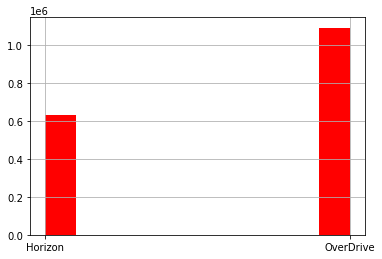

In [42]:
# Verteilung nach Checkouttypen
# Histogramm plotten
checkouts["checkouttype"].hist(color="red")

Es kommen nur zwei Ausleihtypen vor: "Horizon" und "Overdrive".

## 2) Wie ist das Verhältnis von digitalen und physischen Ausleihen?

<AxesSubplot:>

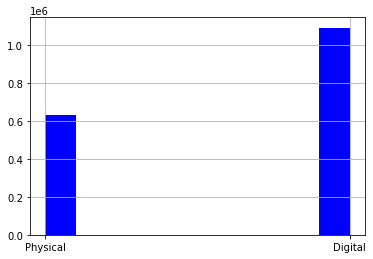

In [9]:
# Histogramm plotten
checkouts["usageclass"].hist(color="blue")

In [10]:
checkouts.usageclass.count()

1721376

In [11]:
type(checkouts["usageclass"])

pandas.core.series.Series

In [26]:
# Ausprobieren: Ansprechen über Index funktionert?
print(checkouts["usageclass"][3])

Digital


In [69]:
# count funktioniert nur für Listen:
checkouts["usageclass"].tolist().count("Digital")

1091407

In [58]:
# Anzahl als Variable
Anzahl_digital = checkouts["usageclass"].tolist().count("Digital")
Anzahl_digital

1091407

In [70]:
#Das gefällt mir noch nicht - ich möchte direkt beides haben für "Digital" und "physical"
mediatype = pd.Index(checkouts.usageclass)
mediatype_table = itemtype.value_counts()
mediatype_table

Digital     1091407
Physical     629969
Name: usageclass, dtype: int64

<AxesSubplot:ylabel='usageclass'>

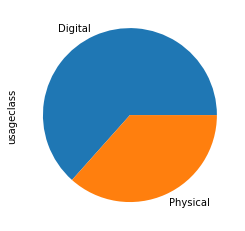

In [72]:
mediatype_table.plot.pie()